# Modeling 

In [16]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

pd.options.display.max_columns = None
pd.options.display.max_rows = None 

In [17]:
ace = pd.read_csv('../Datasets/clean_ace.csv') 

In [18]:
ace.head(3)

,DIABETE4,BPHIGH6,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,ACEADSAF,ACEADNED
0,0.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
1,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
2,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0


### Baseline

In [19]:
# Step 1: Data Preprocessing
X = ace.drop(['DIABETE4', 'BPHIGH6'], axis=1)  # Input features
y_diabetes = ace['DIABETE4']  # Target variable for diabetes prediction

# Split the data into training and test sets for diabetes prediction
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X, y_diabetes, test_size=0.2, random_state=42)

# Create a baseline classifier for diabetes
baseline_classifier_diabetes = DummyClassifier(strategy='most_frequent')

# Fit the baseline classifier on the training data for diabetes
baseline_classifier_diabetes.fit(X_train_diabetes, y_train_diabetes)

# Predict the majority class labels for the test data for diabetes
y_pred_baseline_diabetes = baseline_classifier_diabetes.predict(X_test_diabetes)

# Calculate baseline scores for diabetes
accuracy_diabetes = metrics.accuracy_score(y_test_diabetes, y_pred_baseline_diabetes)
precision_diabetes = metrics.precision_score(y_test_diabetes, y_pred_baseline_diabetes)
recall_diabetes = metrics.recall_score(y_test_diabetes, y_pred_baseline_diabetes)
f1_diabetes = metrics.f1_score(y_test_diabetes, y_pred_baseline_diabetes)

print('Baseline Scores for Diabetes:')
print(f'Accuracy: {accuracy_diabetes}')
print(f'Precision: {precision_diabetes}')
print(f'Recall: {recall_diabetes}')
print(f'F1-Score: {f1_diabetes}')

Baseline Scores for Diabetes:
Accuracy: 0.8351816443594646
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


/Users/danner/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


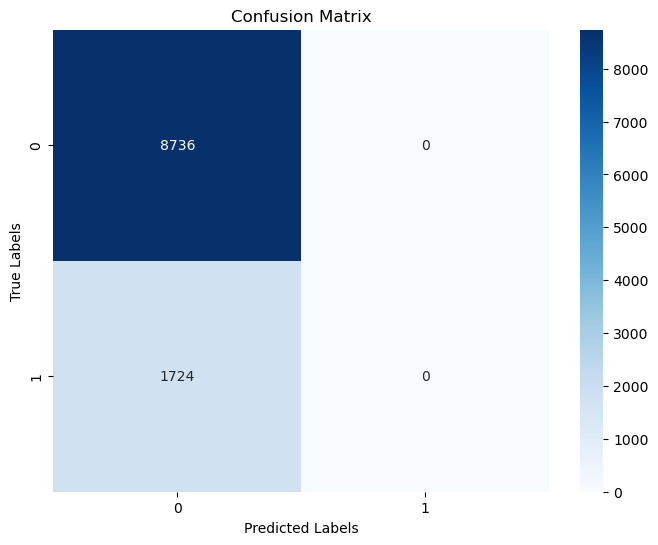

In [20]:
cm = confusion_matrix(y_test_diabetes, y_pred_baseline_diabetes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

In [21]:
# Step 1: Data Preprocessing
X = ace.drop(['DIABETE4', 'BPHIGH6'], axis=1)  # Input features
y_high_blood_pressure = ace['BPHIGH6']  # Target variable for high blood pressure prediction

# Split the data into training and test sets for high blood pressure prediction
X_train_bp, X_test_bp, y_train_bp, y_test_bp = train_test_split(X, y_high_blood_pressure, test_size=0.2, random_state=42)

# Create a baseline classifier for high blood pressure
baseline_classifier_bp = DummyClassifier(strategy='most_frequent')

# Fit the baseline classifier on the training data for high blood pressure
baseline_classifier_bp.fit(X_train_bp, y_train_bp)

# Predict the majority class labels for the test data for high blood pressure
y_pred_baseline_bp = baseline_classifier_bp.predict(X_test_bp)

# Calculate baseline scores for high blood pressure
accuracy_bp = metrics.accuracy_score(y_test_bp, y_pred_baseline_bp)
precision_bp = metrics.precision_score(y_test_bp, y_pred_baseline_bp)
recall_bp = metrics.recall_score(y_test_bp, y_pred_baseline_bp)
f1_bp = metrics.f1_score(y_test_bp, y_pred_baseline_bp)

print('Baseline Scores for High Blood Pressure:')
print(f'Accuracy: {accuracy_bp}')
print(f'Precision: {precision_bp}')
print(f'Recall: {recall_bp}')
print(f'F1-Score: {f1_bp}')

Baseline Scores for High Blood Pressure:
Accuracy: 0.5485659655831739
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


/Users/danner/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


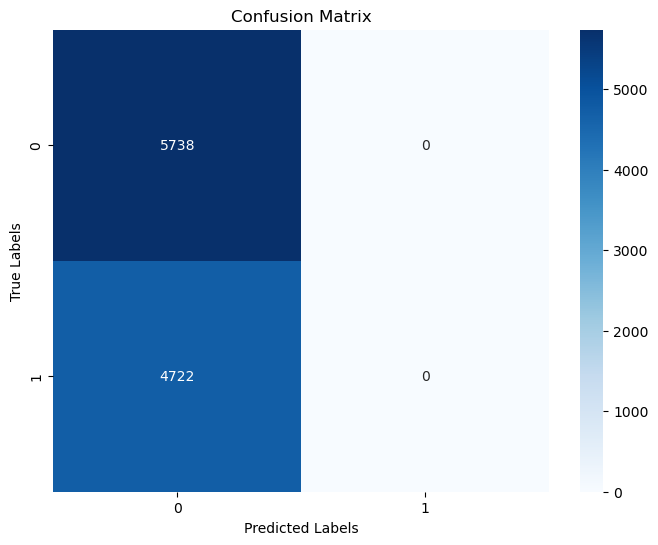

In [22]:
cm = confusion_matrix(y_test_bp, y_pred_baseline_bp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

## Logistic Regression 

### Diabetes

In [23]:
# Step 1: Data Preprocessing
X = ace.drop(['DIABETE4', 'BPHIGH6'], axis=1)  # Input features
y_diabetes = ace['DIABETE4']  # Target variable for diabetes prediction

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_diabetes, test_size=0.2, random_state=42)

# Step 3: Model Selection (Logistic Regression)
model = LogisticRegression()

# Step 4: Model Training
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Accuracy: 0.8351816443594646
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


/Users/danner/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


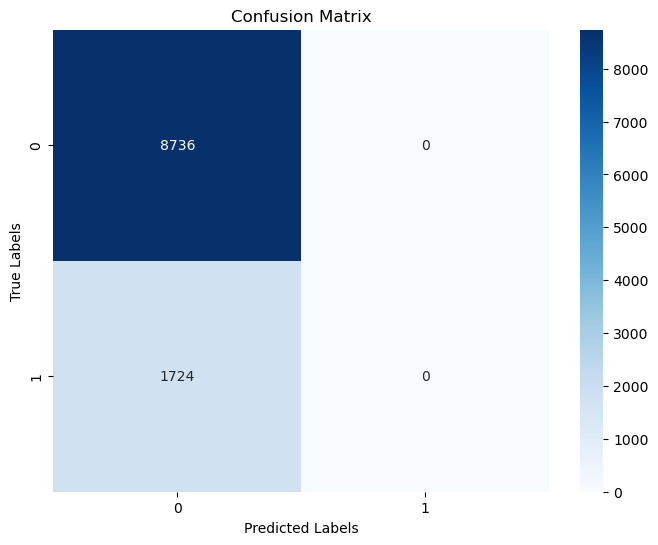

In [24]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

#### Hyperparameters 

In [25]:
##### Step 3: Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced'],
}


##### Step 4: Create the model
model = LogisticRegression()

##### Step 5: Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

##### Step 6: Print the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:')
print(best_params)

##### Step 7: Get the best model with the best hyperparameters
best_model = grid_search.best_estimator_

##### Step 8: Model Evaluation
y_pred = best_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print('Evaluation Metrics:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


Best Hyperparameters:
{'C': 0.001, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Evaluation Metrics:
Accuracy: 0.8351816443594646
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


/Users/danner/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best Hyperparameters:

{'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

Evaluation Metrics:

Accuracy: 0.5652007648183557

Precision: 0.5657168102496134

Recall: 0.892645521087487

F1-Score: 0.6925365062195782

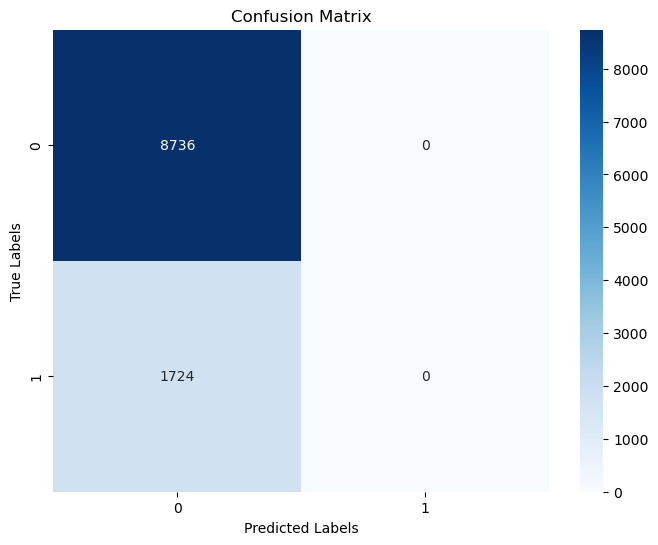

In [26]:
cm = confusion_matrix(y_test, y_pred)  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

### High Blood Pressure

In [27]:
# Step 1: Data Preprocessing
X = ace.drop(['DIABETE4', 'BPHIGH6'], axis=1)  # Input features
y_high_blood_pressure = ace['BPHIGH6']  # Target variable for high blood pressure prediction

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_high_blood_pressure, test_size=0.2, random_state=42)

# Step 3: Model Selection (Logistic Regression)
model = LogisticRegression()

# Step 4: Model Training
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}') 

Accuracy: 0.5668260038240918
Precision: 0.5662734212352533
Recall: 0.17280813214739518
F1-Score: 0.2648061009248742


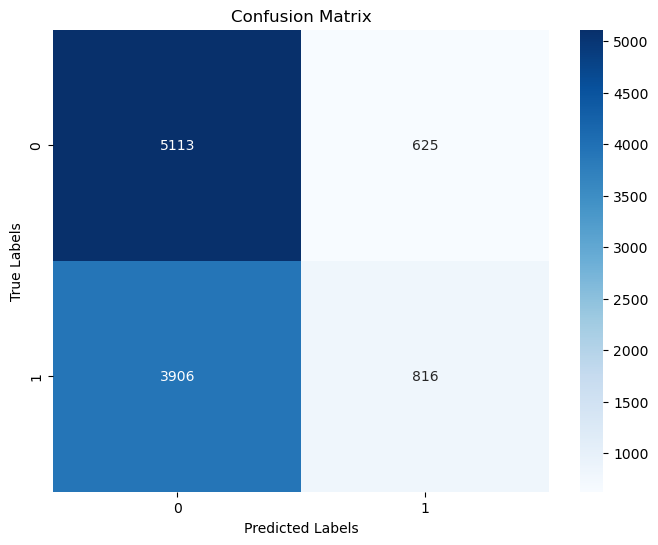

In [28]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

In [29]:
##### Step 3: Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced'],
}

##### Step 5: Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

##### Step 6: Print the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:')
print(best_params)

##### Step 7: Get the best model with the best hyperparameters
best_model = grid_search.best_estimator_

##### Step 8: Model Evaluation
y_pred = best_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print('Evaluation Metrics:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Best Hyperparameters:
{'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Evaluation Metrics:
Accuracy: 0.5652007648183557
Precision: 0.561877667140825
Recall: 0.16730199068191445
F1-Score: 0.2578328981723238


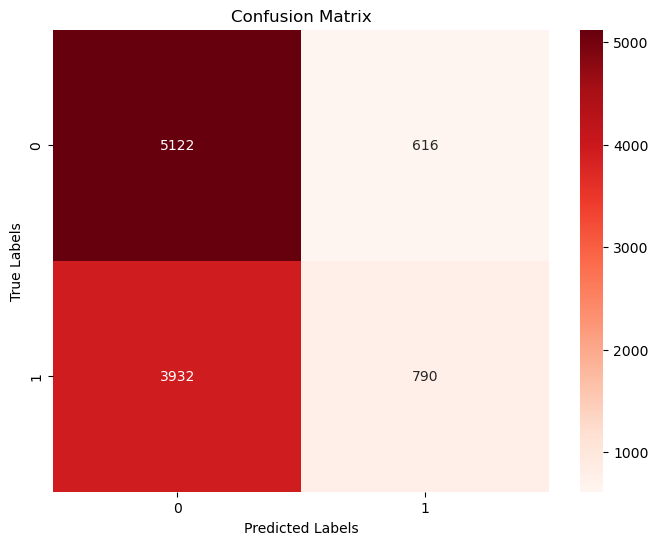

In [30]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');